In [1]:
from solver import *
from sim_data import *

## Test on simple problem

In [3]:
# initialization
# we know the solution to this simple problem is x*=[100,0,...,0]
n = 100
c = np.array([[2.]] + [[1.] for i in range(n - 1)])
M = np.array([[[1.]] for i in range(n)])
A = np.array([[[1.]] for i in range(n)])
d = np.array([float(n)])
b = np.array([[float(n)] for i in range(n)])

In [4]:
# find the optimal solution using the blackbox solver
# the sign of c is negated because we want to convert a max problem to an equivalent min one
argmin_x, lambda_star, optimal_obj = primal_dual_solver(-c, M, A, d, b)
print(argmin_x)

status: optimal, optimal value: -199.9999999994306
[1.00000000e+02 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.1

In [5]:
# find the solution to the same problem using our solver
# the optimal_obj, which is the optimal value of the objective function, needs to be passed in as a stopping criterion
rs = general_st_sampling_solver(c, M, A, d, b, epoch=50, batch_size=1, alpha=1e-3,
                                augmented=True, prox_type="ADMM",
                                ascent_type="vr",
                                is_rep=False, is_cyc=False,
                                optimal_obj=optimal_obj, is_tracking=False)
print(rs)

0/5000.0
Approximated optimal objective value: -200.00000000000054
[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


## Simulation on random data

In [7]:
n_range = [100] + [i for i in range(200, 1800, 200)]
# n_range = [100]
default_time_list, _, ADMM_time_list = sim_multi(n_range, maxit=200, alpha=1e-4, tol=1e-3, seed=42, 
                                                 num_avg=5)

--------
size = 100
status: optimal, optimal value: -5121.257564136352
status: optimal, optimal value: -5121.257564136352
0/20000.0
Approximated optimal objective value: -5116.28947539383
status: optimal, optimal value: -5254.75930854081
status: optimal, optimal value: -5254.75930854081
0/20000.0
Approximated optimal objective value: -5253.352773836694
status: optimal, optimal value: -4878.444888246409
status: optimal, optimal value: -4878.444888246409
0/20000.0
Approximated optimal objective value: -4876.7910895375235
status: optimal, optimal value: -5445.221757332624
status: optimal, optimal value: -5445.221757332624
0/20000.0
Approximated optimal objective value: -5444.294476046702
status: optimal, optimal value: -5324.593465228468
status: optimal, optimal value: -5324.593465228468
0/20000.0
10000/20000.0
Approximated optimal objective value: -5324.428291562355
--------
size = 200
status: optimal, optimal value: -9641.486532685181
status: optimal, optimal value: -9641.486532685181
0

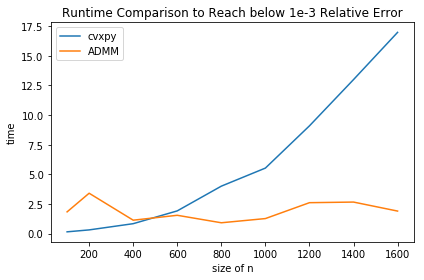

In [8]:
all_lists = [default_time_list, ADMM_time_list]
x = n_range
name = "Runtime Comparison to Reach below 1e-3 Relative Error"
label_list = ["cvxpy", "ADMM"]
plot_util(all_lists, x, name, label_list)